In [1]:
import networkx as nx
import pandas as pd
import numpy as np

from dag import *

# Function that creates edges, given a DAG:
def create_edges(scm):
    L=[]
    for k, v in scm.items():
        for val in v:
            L.append((k,val))
    return L

# CAUSAL GRAPHS IN ACTION

This notebook imports our coded dag module and lets the user test its functionality by inputting different variations of a DAGs

We implemented an algorithm that, given a DAG, an exposure variable, an outcome variable, and a proposed set of adjustment variables, returns true if the set is a valid adjustment set and false otherwise.

The required user inputs should be in the following format:

    DAG: dictionary, where key: cause (str), values (list of str): effected variables
    exposure variable: string, e.g. "D"
    outcome variable: string, e.g. "Y"
    proposed_set: string or list of strings, e.g. "C" or ["C", "X"] or "".

## Inputs for the function:

In [21]:
# settings:

scm = {
    "D": ["Y", "X"],
    "Y": ["F"],
    "F": [],
    "X": [],
    "G": ["D", "Y", "I"],
    "H": ["F"],
    "I": []
}

outcome = "Y"

exposure = "D"

## Visualizing the graph:

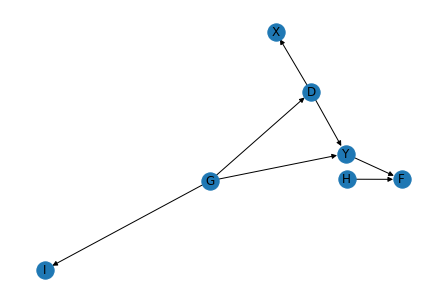

In [22]:
# draw the DAG:

gr = nx.DiGraph()
gr.add_nodes_from(scm)

edges = create_edges(scm)

gr.add_edges_from(edges)

nx.draw(gr, with_labels=True, random_state=42)

## Check if valid adjustment set:

In [17]:
# Propose a VAS:
proposed_set = ["G"]

In [18]:
# instantiate the class:
dag = Dag(scm, outcome, exposure)

# check if it's a valid adjustment set:
dag.is_valid_adjustment_set(proposed_set)

Exception: Exposure is a descendant of the outcome variable. Are you sure you supplied an acyclical graph?